In [13]:
from sklearn import datasets
iris = datasets.load_iris()

target = np.array(iris.target).reshape(-1,1)
iris_full = np.concatenate((iris.data, target), axis=1)
iris_df = pd.DataFrame( iris_full, columns = iris.feature_names + ['target'])


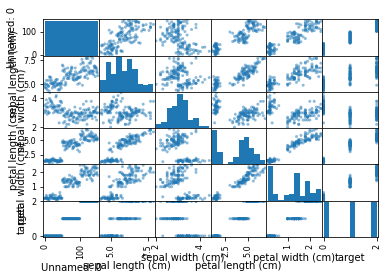

In [5]:
iris_df = pd.read_csv('iris.csv')
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(iris_df)
plt.show()

In [9]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [8]:
for class_number in np.unique(iris.target):
    plt.figure(1)
    iris_df['sepal length (cm)'].iloc[np.where(iris.target == class_number)[0]].hist(bins=30)

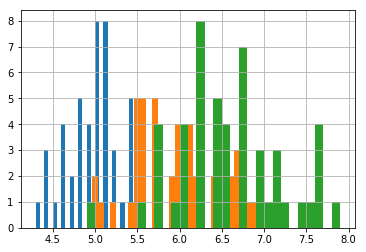

In [9]:
plt.show()

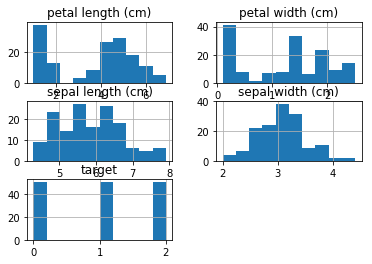

In [10]:
iris_df.hist()
plt.show()

In [12]:
print(iris_df)
iris_df.to_csv('iris.csv')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8      

In [23]:
# Split-out validation dataset

from sklearn import model_selection
validation_size = 0.20
seed = 7
scoring='accuracy'

import random
random.shuffle(iris_df.values)
iris_df.values
X = iris_df.values[:,:4]
Y = iris_df.values[:,4]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [18]:
X_test

array([[4.6, 3.1, 1.5, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [5. , 3.6, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.4, 3.9, 1.7, 0.4],
       [4.8, 3.4, 1.6, 0.2],
       [5. , 3. , 1.6, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.8, 3. , 1.4, 0.1],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 3.6, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3.4, 1.6, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [4.6, 3.1, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.1, 3.8, 1.9, 0.4],
       [5.4, 3.4, 1.5, 0.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [5.9, 3. , 4.2, 1.5],
       [5. , 3.6, 1.4, 0.2],
       [5.1, 3.8, 1.9, 0.4]])

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

In [27]:
def machine_learning(name, model):
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    print(cv_results) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [28]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
machine_learning('KNN', KNeighborsClassifier())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
KNN: 1.000000 (0.000000)


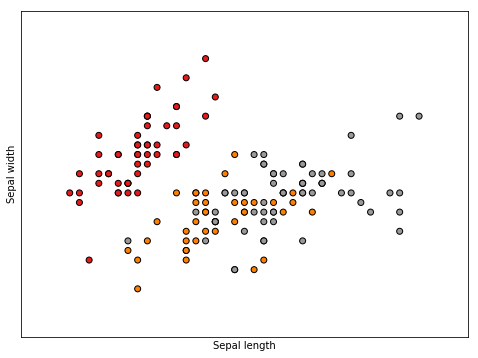

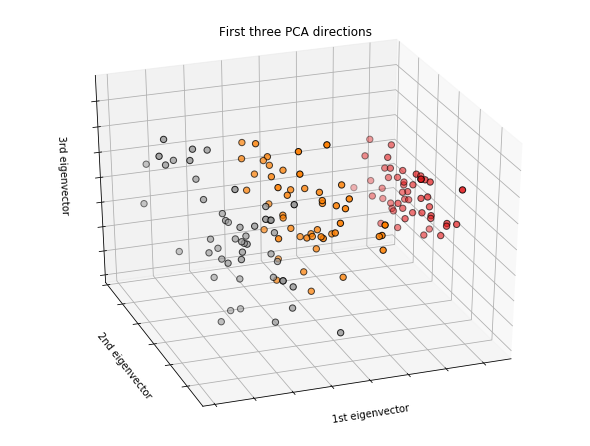

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
